### Tugas Demonstrasi/ Praktik UJK Associate Data Science

#### Deskripsi Dataset

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Data/USA_Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### 1. Exploratory Data Analysis

In [3]:
data.shape

(5000, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Checking for missing values and examining data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(Avg. Area Income                0
 Avg. Area House Age             0
 Avg. Area Number of Rooms       0
 Avg. Area Number of Bedrooms    0
 Area Population                 0
 Price                           0
 Address                         0
 dtype: int64,
 Avg. Area Income                float64
 Avg. Area House Age             float64
 Avg. Area Number of Rooms       float64
 Avg. Area Number of Bedrooms    float64
 Area Population                 float64
 Price                           float64
 Address                          object
 dtype: object)

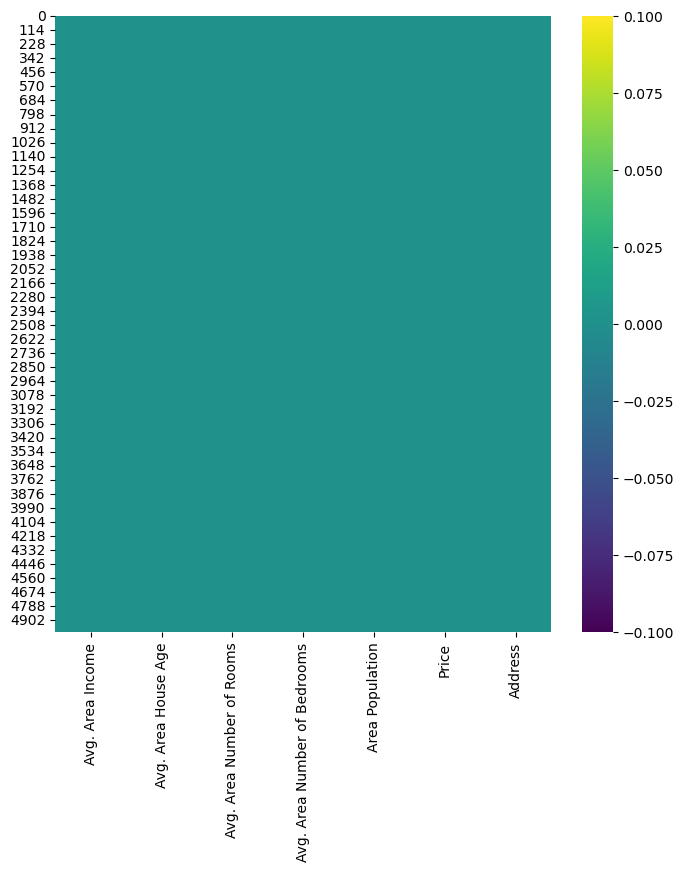

In [6]:
# visualisasi missing values
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(), cmap='viridis');

In [7]:
#Cek deskripsi stastik data
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


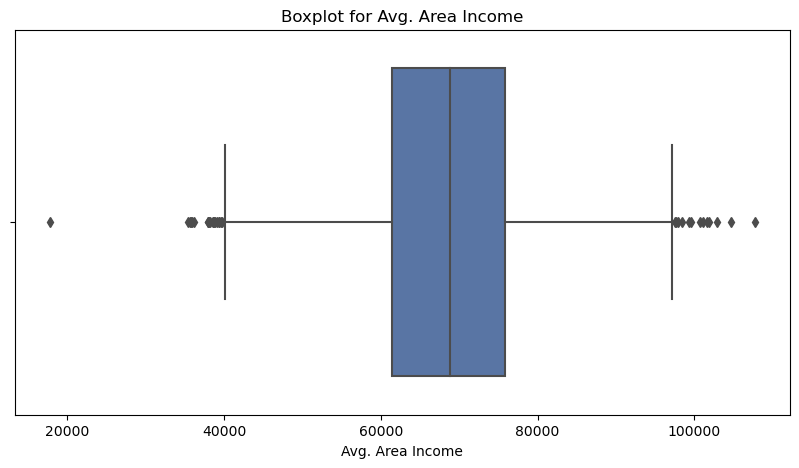

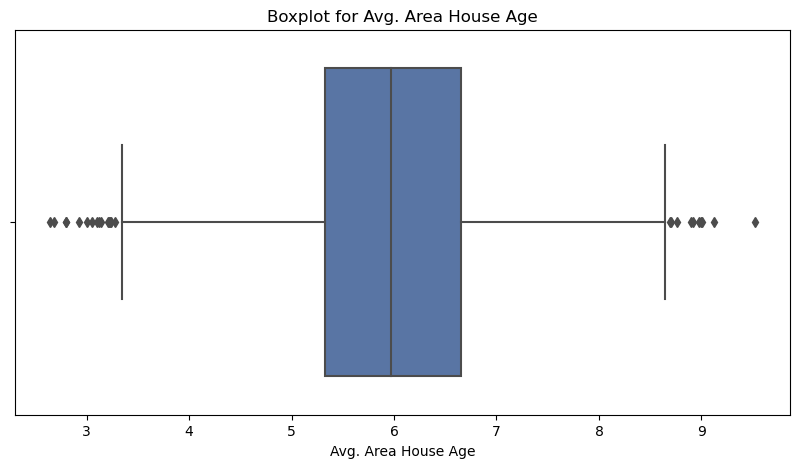

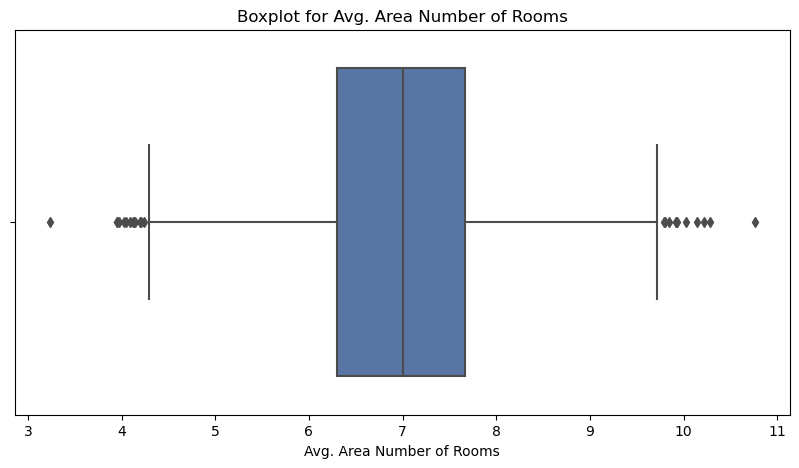

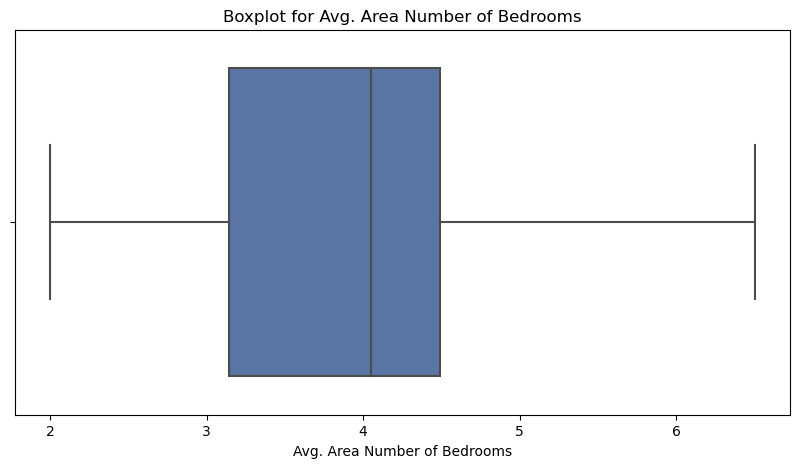

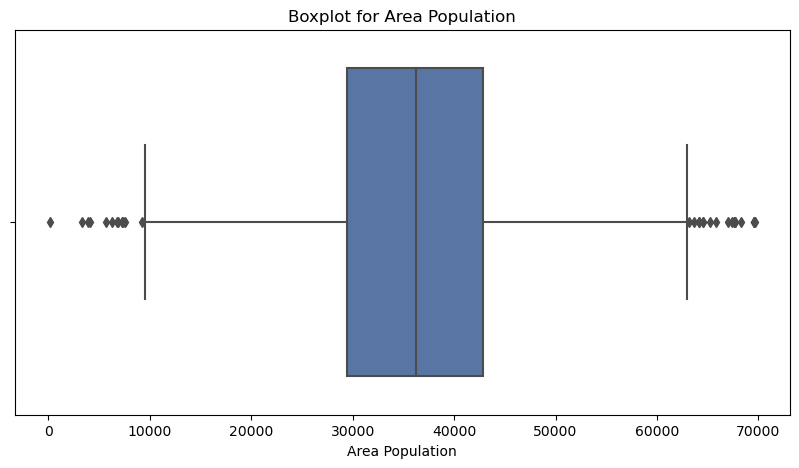

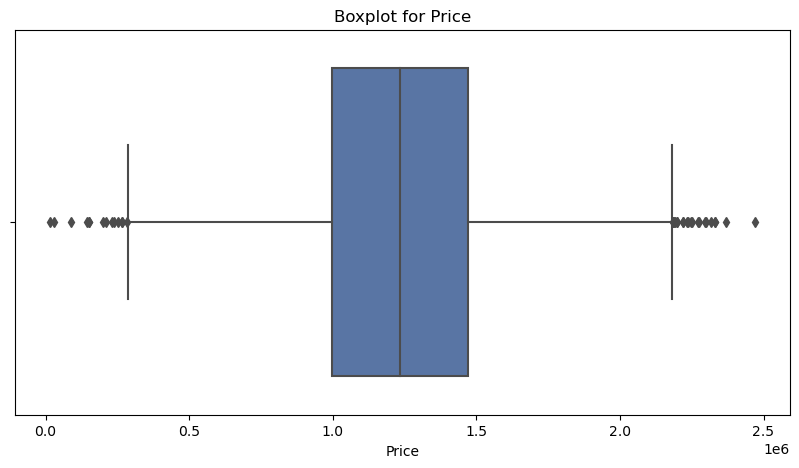

In [8]:
# Cek data outlier
num_feat = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms',
            'Area Population', 'Price']
cat_feat = ['Address']

for num in num_feat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=num, palette='deep')
    plt.title("Boxplot for {}".format(num))
    plt.show()

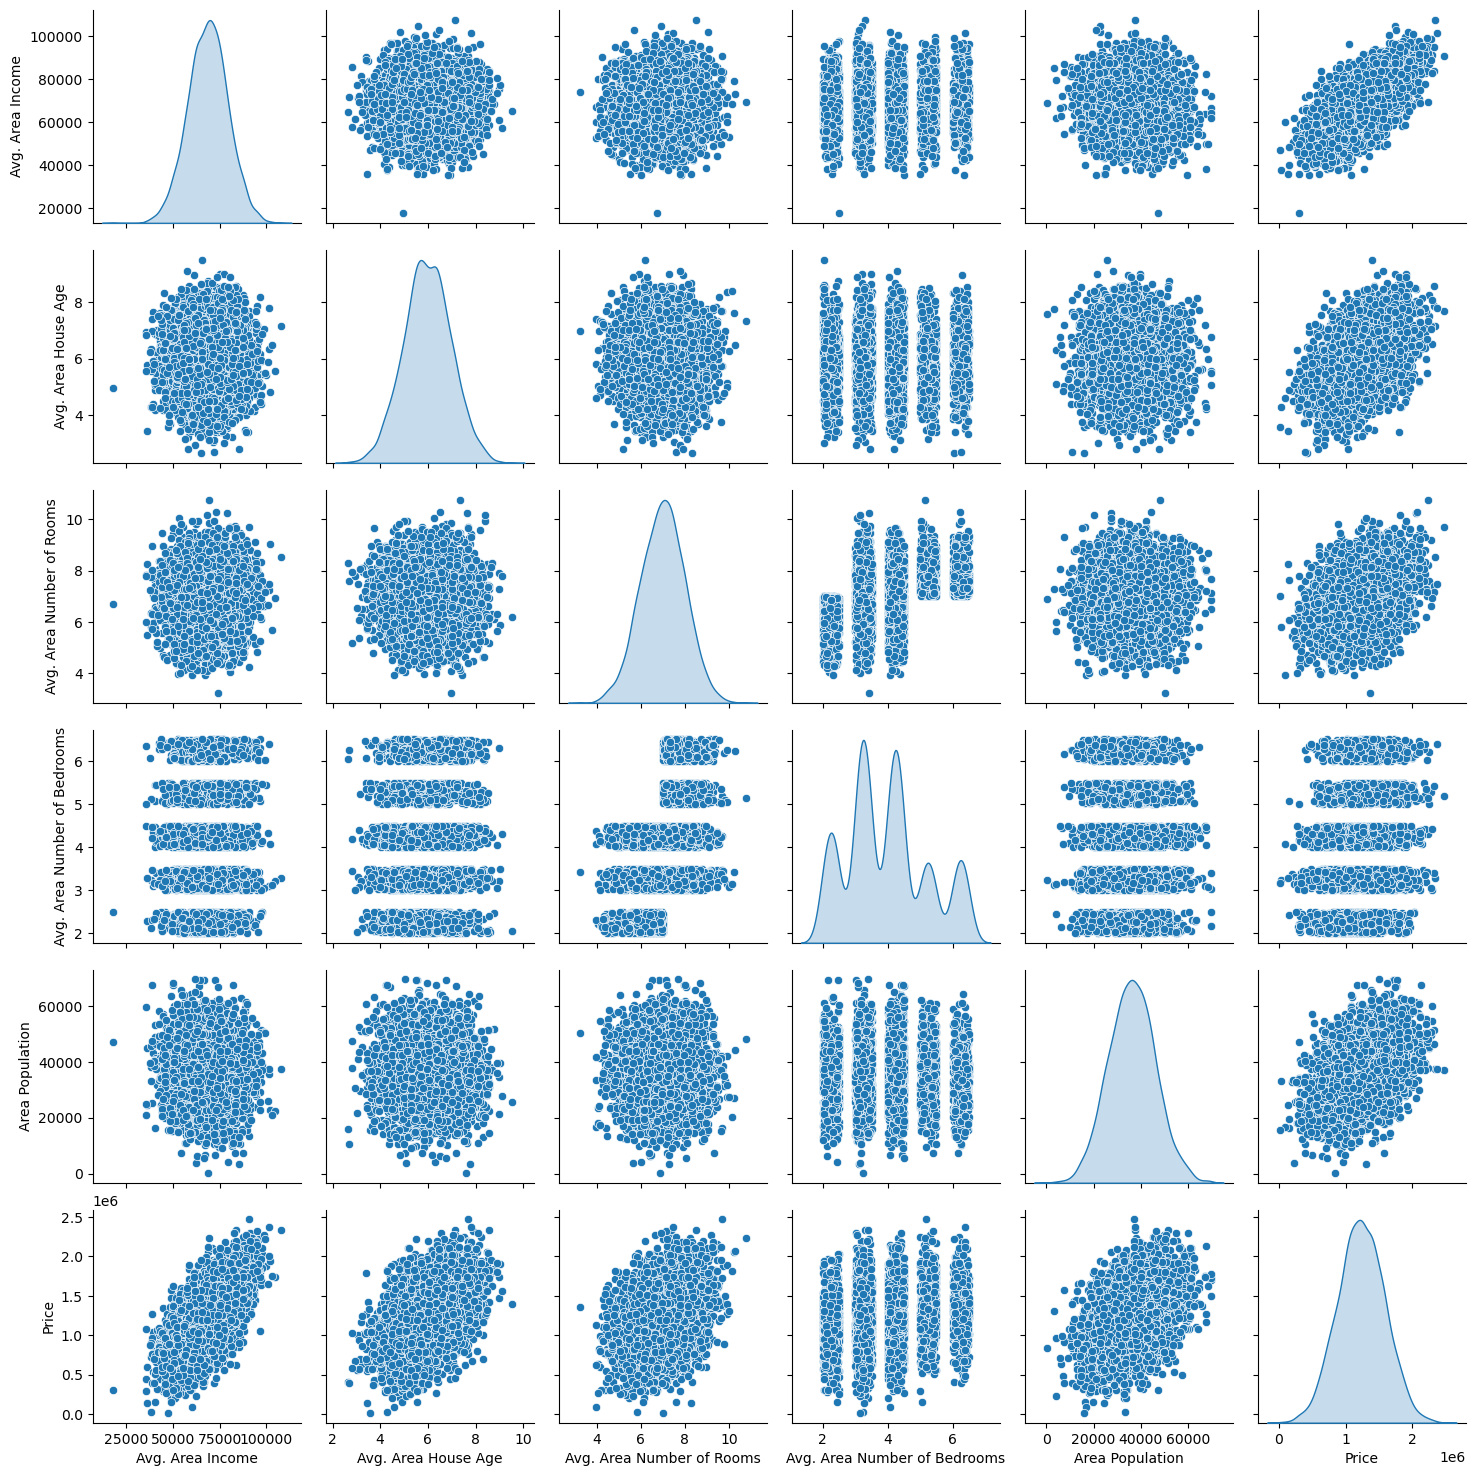

In [9]:
#Numeric
sns.pairplot(data, diag_kind = 'kde')

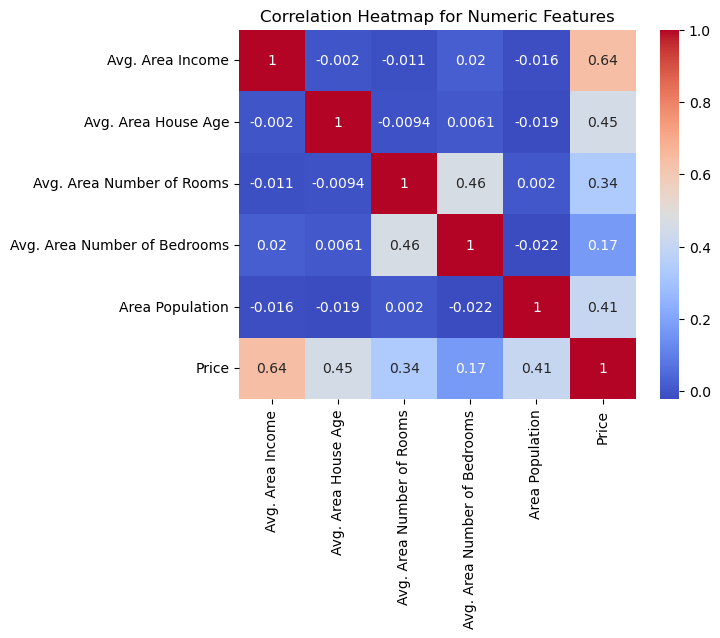

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [10]:
# Correlation matrix for numerical features
# Exclude non-numeric columns for correlation analysis
numeric_df = data.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

# Display the correlation matrix
correlation

## Data Preparation and modeling

In [11]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [12]:
from sklearn.model_selection import train_test_split
# Train Test Split Time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# From the Visuals, We can Easily see that Their is a Linear Pattern
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [13]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.570413
Avg. Area House Age,166552.477670
Avg. Area Number of Rooms,119512.534382
Avg. Area Number of Bedrooms,2758.951878
Area Population,15.296861


In [14]:
# Predictions

predictions = lm.predict(X_test)

### Evaluating Our Model


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model dengan set pelatihan
model.fit(X_train, y_train)

# Membuat prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10119734875.653337
R-squared: 0.916450201435024
